# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score, auc
%matplotlib inline
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [28]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [19]:
pima_df = pd.read_csv("diabetes.csv")


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [20]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [21]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [22]:
pima_df = pima_df.replace(0,pima_df.median())
pima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [23]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

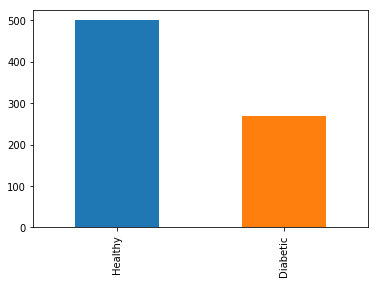

In [62]:
pima_df['Outcome'] = pima_df['Outcome'].replace({0: 'Healthy', 1: 'Diabetic'})

pima_df['Outcome'].value_counts().plot.bar()

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [59]:
pima_df.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


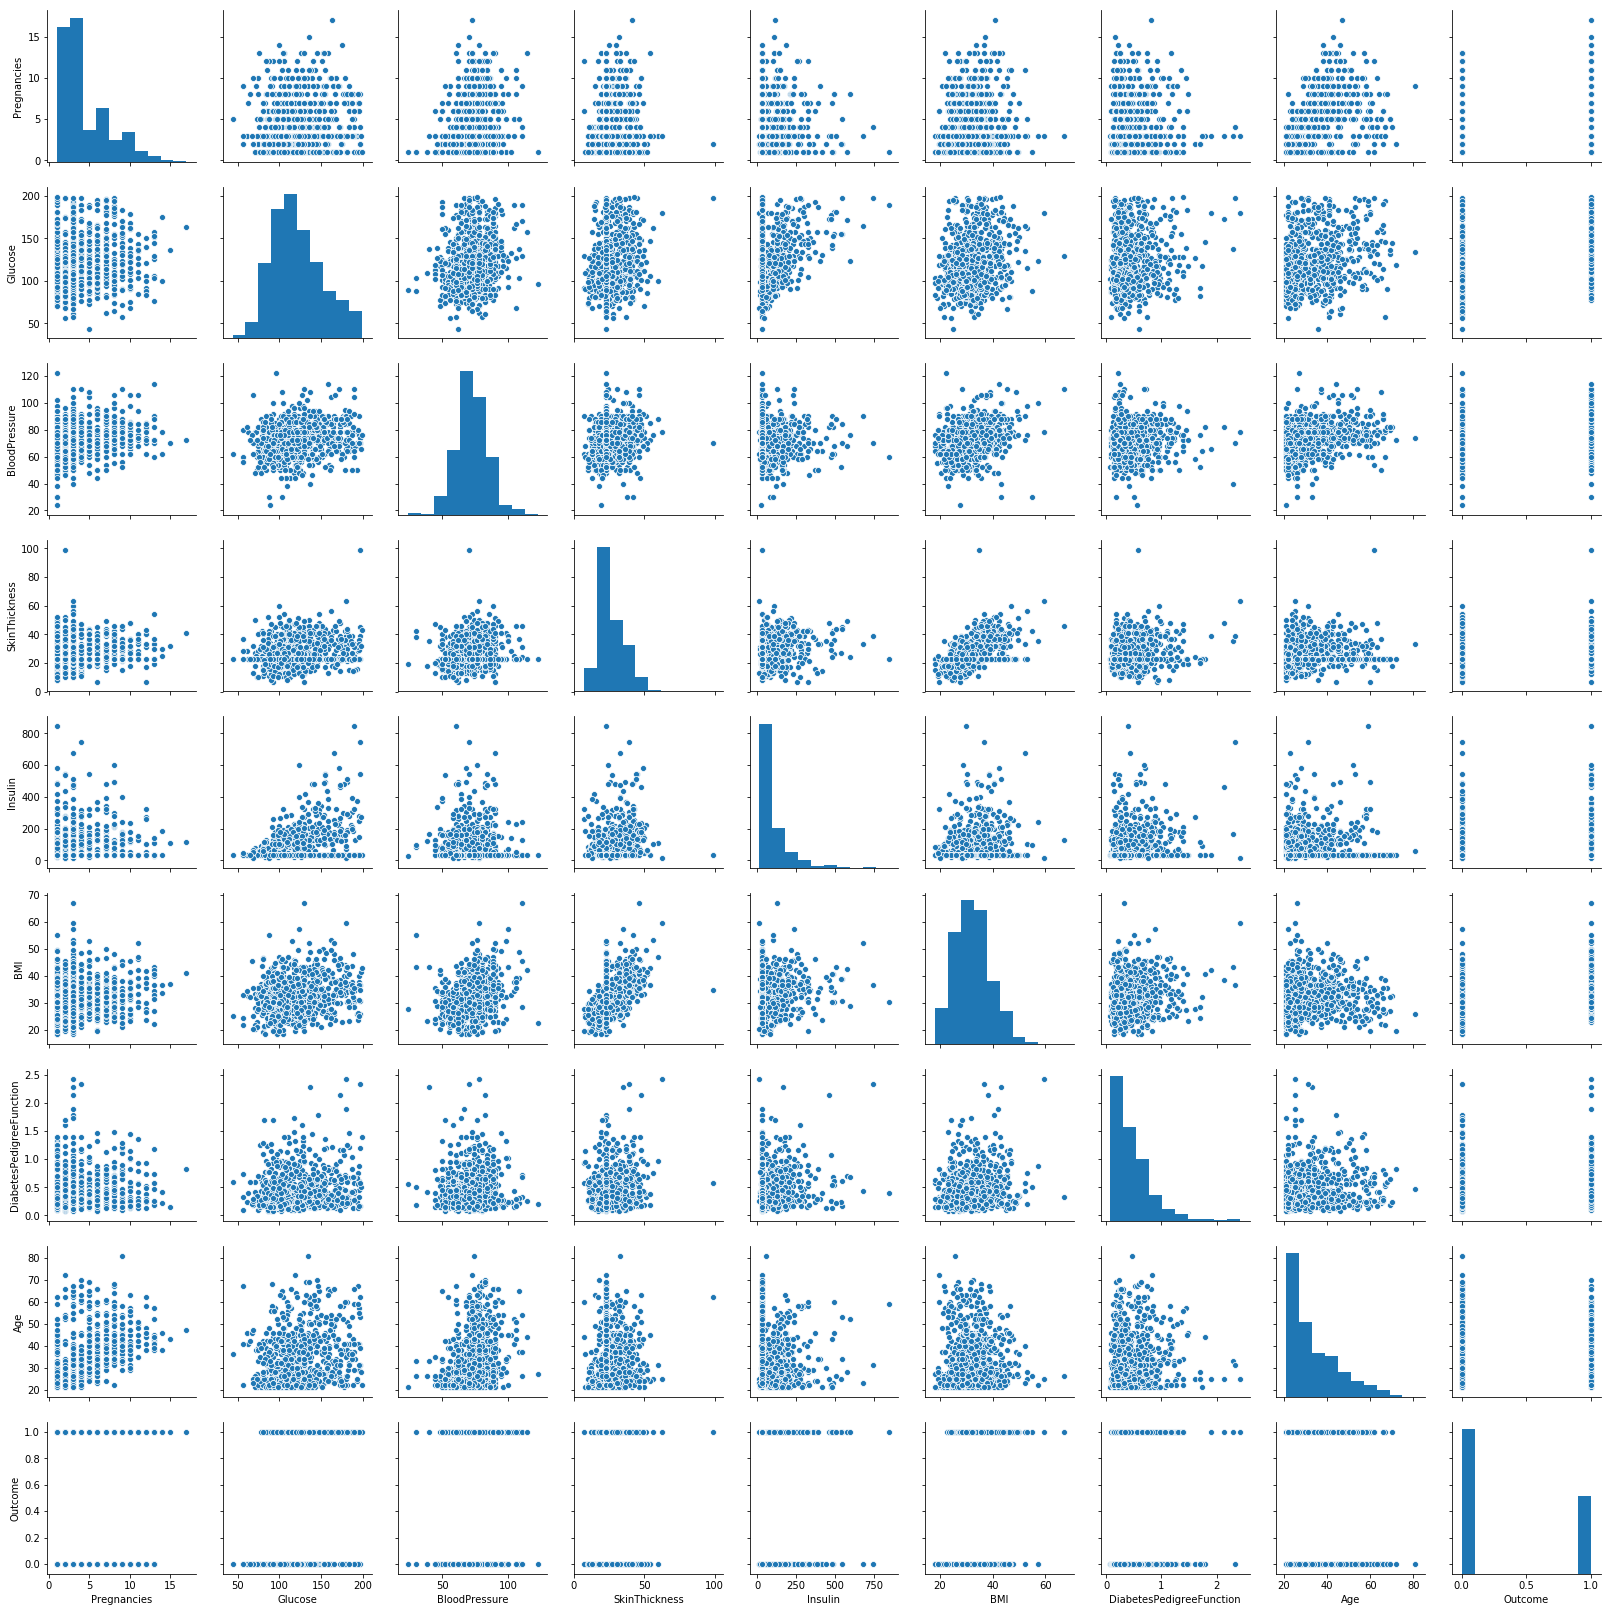

In [60]:
# Pairplot using sns
sns.pairplot(pima_df)

#  My inference of relationship between different variables,
1. BMI SCore is good for lower pregannacy numbers
2. Attributes which look normally distributed (Blood pressure, BMI and Glucose).
3. There is no obvious relationship between age and onset of diabetes.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [30]:
X = pima_df.drop("Outcome", axis=1)
y = pima_df["Outcome"]

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [39]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

preds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds), 
                   precision_score(y_test, preds),
                   f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.727273
recall,0.619048
precision,0.626506
f1_score,0.622754


In [40]:
y_pred=model.predict(X_test)
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix is:\n", cm)

Confusion matrix is:
 [[116  31]
 [ 32  52]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [46]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0)
Rf_model.fit(X_train,y_train)
y_pred= Rf_model.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7532467532467533


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [47]:
boost_rf = AdaBoostClassifier(base_estimator=Rf_model,n_estimators=51,random_state=2)
boost_rf.fit(X_train,y_train)
y_pred= boost_rf.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7792207792207793


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [54]:
bag_dt=BaggingClassifier(n_estimators=51,random_state=2)
bag_dt.fit(X_train,y_train)
y_pred= bag_dt.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7445887445887446


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [58]:
gb_model = GradientBoostingClassifier(n_estimators=71,random_state=2)
gb_model.fit(X_train,y_train)
y_pred= gb_model.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.7835497835497836


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.